In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Read .csv files
df_transaction = pd.read_csv('user_transaction_cleaned.csv')
print("\n df_transaction")
print(df_transaction)

df_nodes = pd.read_csv('user_nodes_cleaned.csv')
print("\n df_nodes")
print(df_nodes)

df_regions = pd.read_csv('world_regions.csv')
print("\n df_regions")
print(df_regions)


 df_transaction
      consumer_id transaction_date transaction_type  transaction_amount
0             312       20-01-2020          deposit                 485
1             376       03-01-2020          deposit                 706
2             188       13-01-2020          deposit                 601
3             138       11-01-2020          deposit                 520
4             373       18-01-2020          deposit                 596
...           ...              ...              ...                 ...
5863          155       10-01-2020          deposit                 712
5864          398       01-01-2020          deposit                 196
5865          255       14-01-2020          deposit                 563
5866          185       29-01-2020          deposit                 626
5867          309       13-01-2020          deposit                 995

[5868 rows x 4 columns]

 df_nodes
      consumer_id  region_id  node_id  start_date    end_date
0               1    

In [5]:
# List all regions along with the number of users assigned to each region.
# Join df_nodes and df_regions on region_id
merged_df = df_nodes.merge(df_regions, on="region_id")
# Group by region_name and count the number of users
region_user_counts = merged_df.groupby("region_name")["consumer_id"].count().reset_index()

# Rename the count column
region_user_counts.rename(columns={"consumer_id": "number_of_users"}, inplace=True)

# Display the result
print(region_user_counts)

     region_name  number_of_users
0         Africa              616
1           Asia              665
2      Australia              714
3         Europe              735
4  United States              770


In [6]:
# Find the user who made the largest deposit amount and the transaction type for that deposit.
# Find the row with the largest deposit amount
max_deposit_row = df_transaction[df_transaction['transaction_type'] == 'deposit']['transaction_amount'].idxmax()

# Get the user and transaction type for the largest deposit
largest_deposit_user = df_transaction.loc[max_deposit_row, 'consumer_id']
largest_deposit_type = df_transaction.loc[max_deposit_row, 'transaction_type']

# Display the result
print("User with the largest deposit amount:", largest_deposit_user)
print("Transaction type for the largest deposit:", largest_deposit_type)

User with the largest deposit amount: 218
Transaction type for the largest deposit: deposit


In [7]:
# Calculate the total amount deposited for each user in the "Europe" region.
# Filter df_nodes to include only users in the "Europe" region
europe_users = df_nodes[df_nodes['region_id'] == 2]

# Merge df_transaction with the filtered df_nodes to get transactions of users in "Europe"
europe_transactions = df_transaction.merge(europe_users, on='consumer_id')

# Calculate the total amount deposited for each user in "Europe"
total_deposits_europe = europe_transactions.groupby('consumer_id')['transaction_amount'].sum().reset_index()
pd.set_option('display.max_rows', None)

# Display the result
print(total_deposits_europe)

     consumer_id  transaction_amount
0              7               45871
1             11               48762
2             13               35665
3             17               12754
4             19               12292
5             20               18046
6             24               25662
7             29               65016
8             30               10052
9             34               19537
10            36               35231
11            40               50778
12            43               43757
13            45               61572
14            49               69496
15            50               43092
16            62                8393
17            64               33803
18            76               77889
19            82               71274
20            83               56203
21            87               46291
22            99                8127
23           101               28231
24           106               47922
25           107               12362
2

In [8]:
# Calculate the total number of transactions made by each user in the "United States" region.
# Filter df_nodes to include only users in the "United States" region
us_users = df_nodes[df_nodes['region_id'] == 1]

# Merge df_transaction with the filtered df_nodes to get transactions of users in "United States"
us_transactions = df_transaction.merge(us_users, on='consumer_id')

# Calculate the total number of transactions made by each user in "United States"
transaction_counts_us = us_transactions.groupby('consumer_id').size().reset_index(name='total_transactions')

# Display the result
print(transaction_counts_us)

     consumer_id  total_transactions
0              6                 133
1              8                  70
2             12                  28
3             14                  28
4             15                  14
5             18                  56
6             23                  42
7             37                 154
8             46                  91
9             51                  77
10            63                  91
11            65                  49
12            66                  70
13            69                 154
14            71                  28
15            73                  14
16            79                  21
17            81                  84
18            84                  14
19            95                 105
20            98                  70
21           100                  63
22           102                 147
23           105                  77
24           108                  70
25           112                  56
2

In [9]:
# Calculate the total number of users who made more than 5 transactions.
# Filter users who made more than 5 transactions
users_more_than_5_transactions = transaction_counts_us[transaction_counts_us['total_transactions'] > 5]

# Calculate the total number of users who made more than 5 transactions
total_users_more_than_5_transactions = len(users_more_than_5_transactions)

# Display the result
print("Total number of users who made more than 5 transactions:", total_users_more_than_5_transactions)

Total number of users who made more than 5 transactions: 110


In [10]:
# Find the regions with the highest number of nodes assigned to them.
# Group the nodes by region_id and count the number of nodes in each region
region_node_counts = df_nodes.groupby('region_id')['node_id'].count().reset_index()

# Find the region(s) with the highest number of nodes
max_node_count = region_node_counts['node_id'].max()
regions_with_highest_nodes = region_node_counts[region_node_counts['node_id'] == max_node_count]

# Merge with df_regions to get the region names
regions_with_highest_nodes = regions_with_highest_nodes.merge(df_regions, on='region_id')

# Display the result
print("Region(s) with the highest number of nodes assigned:")
print(regions_with_highest_nodes)

Region(s) with the highest number of nodes assigned:
   region_id  node_id    region_name
0          1      770  United States


In [11]:
# Find the user who made the largest deposit amount in the "Australia" region.
# Filter df_nodes to include only users in the "Australia" region
australia_users = df_nodes[df_nodes['region_id'] == 3]

# Merge df_transaction with the filtered df_nodes to get transactions of users in "Australia"
australia_transactions = df_transaction.merge(australia_users, on='consumer_id')

# Find the row with the largest deposit amount in "Australia"
max_deposit_row_australia = australia_transactions[australia_transactions['transaction_type'] == 'deposit']['transaction_amount'].idxmax()

# Get the user and transaction type for the largest deposit in "Australia"
largest_deposit_user_australia = australia_transactions.loc[max_deposit_row_australia, 'consumer_id']
largest_deposit_type_australia = australia_transactions.loc[max_deposit_row_australia, 'transaction_type']

# Display the result
print("User with the largest deposit amount in 'Australia' region:", largest_deposit_user_australia)
print("Transaction type for the largest deposit:", largest_deposit_type_australia)

User with the largest deposit amount in 'Australia' region: 285
Transaction type for the largest deposit: deposit


In [12]:
# Calculate the total amount deposited by each user in each region.
# Merge df_transaction with df_nodes to include region information
merged_df = df_transaction.merge(df_nodes, on='consumer_id')

# Merge the above result with df_regions to include region names
merged_df = merged_df.merge(df_regions, on='region_id')

# Group by user and region, and sum the transaction amounts
total_deposits_by_user_region = merged_df.groupby(['consumer_id', 'region_name'])['transaction_amount'].sum().reset_index()

# Display the result
print(total_deposits_by_user_region)

     consumer_id    region_name  transaction_amount
0              1      Australia               13384
1              2      Australia                4270
2              3         Africa               14021
3              4         Africa                7287
4              5      Australia               57631
5              6  United States               63728
6              7         Europe               45871
7              8  United States               36729
8              9           Asia               38458
9             10      Australia               73500
10            11         Europe               48762
11            12  United States               13951
12            13         Europe               35665
13            14  United States               15155
14            15  United States                7714
15            16           Asia               63602
16            17         Europe               12754
17            18  United States               26873
18          

In [13]:
# Retrieve the total number of transactions for each region
# Merge df_transaction with df_nodes to include region information
merged_df = df_transaction.merge(df_nodes, on='consumer_id')

# Merge the above result with df_regions to include region names
merged_df = merged_df.merge(df_regions, on='region_id')

# Group by region and count the number of transactions in each region
total_transactions_by_region = merged_df.groupby('region_name')['transaction_amount'].count().reset_index()

# Rename the count column
total_transactions_by_region.rename(columns={'transaction_amount': 'total_transactions'}, inplace=True)

# Display the result
print(total_transactions_by_region)

     region_name  total_transactions
0         Africa                6797
1           Asia                7952
2      Australia                8414
3         Europe                8806
4  United States                9107


In [14]:
# Find the total deposit amount for each region (region_name) in the user_transaction table. 
# Consider only those transactions where the consumer_id is associated with a valid region in the user_nodes table.
# Merge df_transaction with df_nodes to include region information
merged_df = df_transaction.merge(df_nodes, on='consumer_id', how='inner')

# Merge the above result with df_regions to include region names
merged_df = merged_df.merge(df_regions, on='region_id', how='inner')

# Filter for transactions of type 'deposit'
deposits_df = merged_df[merged_df['transaction_type'] == 'deposit']

# Group by region_name and calculate the total deposit amount for each region
total_deposit_by_region = deposits_df.groupby('region_name')['transaction_amount'].sum().reset_index()

# Display the result
print(total_deposit_by_region)

     region_name  transaction_amount
0         Africa             1610791
1           Asia             1853110
2      Australia             1851703
3         Europe             2120503
4  United States             2078069


In [15]:
# Find the top 5 consumers who have made the highest total transaction amount (sum of all their deposit transactions) 
# in the user_transaction table.
# Filter for transactions of type 'deposit'
deposits_df = df_transaction[df_transaction['transaction_type'] == 'deposit']

# Group by consumer_id and calculate the total deposit amount for each consumer
total_deposit_by_consumer = deposits_df.groupby('consumer_id')['transaction_amount'].sum().reset_index()

# Sort the consumers by total deposit amount in descending order
top_consumers = total_deposit_by_consumer.sort_values(by='transaction_amount', ascending=False)

# Get the top 5 consumers
top_5_consumers = top_consumers.head(5)

# Display the result
print(top_5_consumers)

     consumer_id  transaction_amount
196          197                8097
280          281                7658
375          376                7287
415          416                7286
202          203                6956


In [16]:
# How many consumers are allocated to each region?
# Group by region_id and count the number of consumers in each region
consumers_by_region = df_nodes.groupby('region_id')['consumer_id'].count().reset_index()

# Merge with df_regions to get the region names
consumers_by_region = consumers_by_region.merge(df_regions, on='region_id')

# Rename the count column
consumers_by_region.rename(columns={'consumer_id': 'number_of_consumers'}, inplace=True)

# Display the result
print(consumers_by_region)

   region_id  number_of_consumers    region_name
0          1                  770  United States
1          2                  735         Europe
2          3                  714      Australia
3          4                  665           Asia
4          5                  616         Africa


In [17]:
# What is the unique count and total amount for each transaction type?
# Group by transaction_type and calculate unique count and total amount for each type
transaction_stats = df_transaction.groupby('transaction_type').agg({'consumer_id': 'nunique', 'transaction_amount': 'sum'}).reset_index()

# Rename the columns for clarity
transaction_stats.rename(columns={'consumer_id': 'unique_count', 'transaction_amount': 'total_amount'}, inplace=True)

# Display the result
print(transaction_stats)

  transaction_type  unique_count  total_amount
0          deposit           500       1359168
1         purchase           448        806537
2       withdrawal           439        793003


In [18]:
# What is the average total historical deposit counts and amounts for all customers?
# Filter for transactions of type 'deposit'
deposits_df = df_transaction[df_transaction['transaction_type'] == 'deposit']

# Group by consumer_id and calculate the total deposit amount and count of deposits for each customer
customer_deposit_stats = deposits_df.groupby('consumer_id').agg({'transaction_amount': 'sum', 'transaction_type': 'count'}).reset_index()

# Calculate the average total deposit count and amount for all customers
average_deposit_count = customer_deposit_stats['transaction_type'].mean()
average_deposit_amount = customer_deposit_stats['transaction_amount'].mean()

# Display the result
print("Average Total Historical Deposit Counts for All Customers:", average_deposit_count)
print("Average Total Historical Deposit Amounts for All Customers:", average_deposit_amount)

Average Total Historical Deposit Counts for All Customers: 5.342
Average Total Historical Deposit Amounts for All Customers: 2718.336


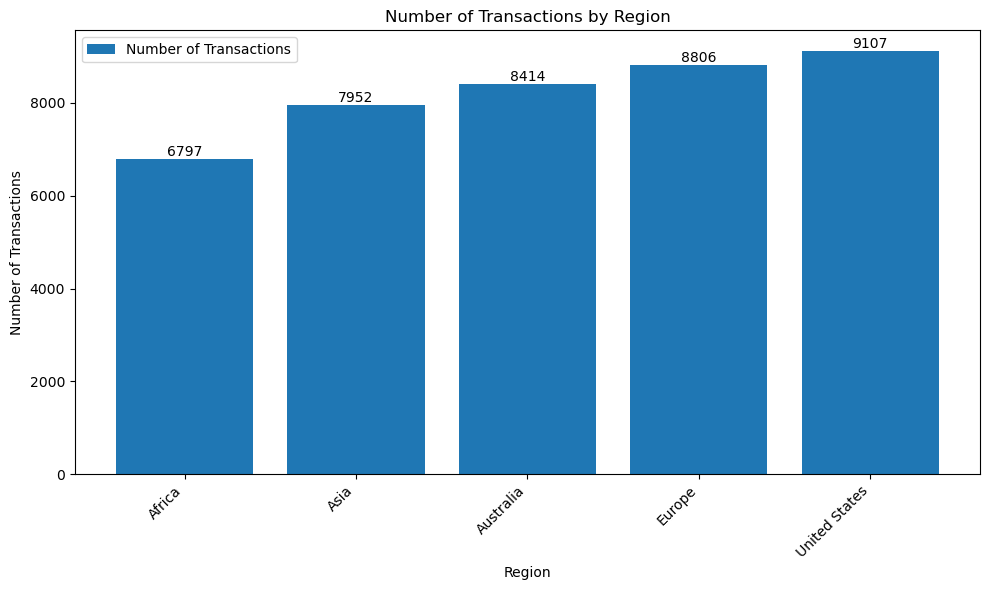

In [19]:
# How many transactions were made by consumers from each region?
# Merge df_transaction with df_nodes to include region information
merged_df = df_transaction.merge(df_nodes, on='consumer_id', how='inner')

# Merge the above result with df_regions to include region names
merged_df = merged_df.merge(df_regions, on='region_id', how='inner')

# Group by region_name and calculate the number of transactions in each region
transactions_by_region = merged_df.groupby('region_name')['transaction_type'].count().reset_index()

# Rename the count column
transactions_by_region.rename(columns={'transaction_type': 'number_of_transactions'}, inplace=True)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(transactions_by_region['region_name'], transactions_by_region['number_of_transactions'])
plt.xlabel('Region')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Region')
plt.xticks(rotation=45, ha='right')

# Print values on the graph
for i, v in enumerate(transactions_by_region['number_of_transactions']):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Show a legend
plt.legend(['Number of Transactions'])

# Display the result
plt.tight_layout()
plt.show()